# TP1 - Laboratorio de Datos
-----------------------------

## 1er Cuatrimestre - 2024

#### _Iván Exequiel Pintos - Joaquín Rovner - Juan José García Vizioli_
______________

- Importamos todas las librerías que venimos usando:

In [10]:
import seaborn as sns
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn.objects as so

from scipy import stats
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#from formulaic import model_matrix

- Leemos el dataset:

In [11]:
#@title Usando Colab

from google.colab import drive
drive.mount('/content/drive')

sube_2023_file_path = '/content/drive/My Drive/LDD-TP1/sube-2023.csv'

ModuleNotFoundError: No module named 'google.colab'

In [12]:
#@title Usando Jupyter

sube_2023_file_path = '../LDD-TP1/sube-2023.csv'

In [13]:
SUBE_2023 = pd.read_csv(sube_2023_file_path)

## Procesamiento de Datos


### <br>Ejercicio 1) <br>

#### a) Visualizamos el tipo de dato de cada columna: <br>

In [14]:
#Definimos una función que nos permita ver el tipo de dato correspondiente a cada columna del DataFrame.

def ver_tipos_datos_columnas(df):
    if not isinstance(df, pd.DataFrame):
        df = pd.DataFrame(df)
    lista = [] 
    for col in df:
        lista.append([col,type(df[col][0])])
    display(pd.DataFrame(lista, columns = ["COLUMNA","TIPO DE DATO"]))
    
ver_tipos_datos_columnas(SUBE_2023)

,COLUMNA,TIPO DE DATO
0,DIA_TRANSPORTE,<class 'str'>
1,NOMBRE_EMPRESA,<class 'str'>
2,LINEA,<class 'str'>
3,AMBA,<class 'str'>
4,TIPO_TRANSPORTE,<class 'str'>
5,JURISDICCION,<class 'str'>
6,PROVINCIA,<class 'str'>
7,MUNICIPIO,<class 'str'>
8,CANTIDAD,<class 'numpy.int64'>
9,DATO_PRELIMINAR,<class 'str'>


#### <br> ... Luego, le cambiamos el formato a la columna DIA_TRANSPORTE:<br>

In [15]:
SUBE_2023['DIA_TRANSPORTE'] = pd.to_datetime(SUBE_2023['DIA_TRANSPORTE']) #investigar argumento "format"

*Corroboramos que el tipo de dato de la columna ahora es un time_stamp:*

In [16]:
ver_tipos_datos_columnas(SUBE_2023)

,COLUMNA,TIPO DE DATO
0,DIA_TRANSPORTE,<class 'pandas._libs.tslibs.timestamps.Timesta...
1,NOMBRE_EMPRESA,<class 'str'>
2,LINEA,<class 'str'>
3,AMBA,<class 'str'>
4,TIPO_TRANSPORTE,<class 'str'>
5,JURISDICCION,<class 'str'>
6,PROVINCIA,<class 'str'>
7,MUNICIPIO,<class 'str'>
8,CANTIDAD,<class 'numpy.int64'>
9,DATO_PRELIMINAR,<class 'str'>


#### <br> b) i) Agregamos la columna FECHA_DIA a partir de DIA_TRANSPORTE <br>

In [17]:
SUBE_2023["FECHA_DIA"] = SUBE_2023['DIA_TRANSPORTE'].apply(lambda x : x.strftime('%a'))

*Vemos que la columna sigue el formato de 3 letras en inglés pedido:*

In [18]:
SUBE_2023.head()

,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR,FECHA_DIA
0,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,1,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,61,NO,Sun
1,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,2B,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,11,NO,Sun
2,2023-01-01,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1707,NO,Sun
3,2023-01-01,COMPAÑIA DE TRANSPORTE VECINAL S.A.,BS_AS_LINEA_326,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,438,NO,Sun
4,2023-01-01,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1189,NO,Sun


#### <br> b) ii) Agregamos la columna FECHA_ORDINAL a partir de DIA_TRANSPORTE <br>


In [19]:
SUBE_2023["FECHA_ORDINAL"] = SUBE_2023['DIA_TRANSPORTE'].apply(lambda x : int(x.strftime('%d'))) 
#Da el día del mes de 1 a 31. Si quisiéramos ir de 1 a 366, usamos '%-j'.

*Vemos que la columna FECHA_ORDINAL tiene el formato pedido y que además sus datos son del tipo int:*

In [20]:
display(SUBE_2023.head())
ver_tipos_datos_columnas(SUBE_2023["FECHA_ORDINAL"])

,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR,FECHA_DIA,FECHA_ORDINAL
0,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,1,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,61,NO,Sun,1
1,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,2B,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,11,NO,Sun,1
2,2023-01-01,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1707,NO,Sun,1
3,2023-01-01,COMPAÑIA DE TRANSPORTE VECINAL S.A.,BS_AS_LINEA_326,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,438,NO,Sun,1
4,2023-01-01,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1189,NO,Sun,1


,COLUMNA,TIPO DE DATO
0,FECHA_ORDINAL,<class 'numpy.int64'>


#### <br>b) iii) Agregamos la columna FECHA_MES a partir de DIA_TRANSPORTE<br>

In [21]:
SUBE_2023["FECHA_MES"] = SUBE_2023['DIA_TRANSPORTE'].apply(lambda x : x.strftime('%m'))

*Vemos que la columna sigue el formato de string de número de 2 dígitos pedido*

In [22]:
SUBE_2023.head()

,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR,FECHA_DIA,FECHA_ORDINAL,FECHA_MES
0,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,1,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,61,NO,Sun,1,01
1,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,2B,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,11,NO,Sun,1,01
2,2023-01-01,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1707,NO,Sun,1,01
3,2023-01-01,COMPAÑIA DE TRANSPORTE VECINAL S.A.,BS_AS_LINEA_326,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,438,NO,Sun,1,01
4,2023-01-01,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1189,NO,Sun,1,01


### <br> Ejercicio 2)<br>

#### Creamos el DataFrame *datos_amba* el cual sólo contiene datos de AMBA y excluye los datos preliminares <br>

In [23]:
datos_amba = SUBE_2023[np.logical_and(SUBE_2023['AMBA'] == 'SI', SUBE_2023['DATO_PRELIMINAR'] == 'NO')]

columnas_datos_amba = ['DIA_TRANSPORTE','FECHA_DIA','FECHA_MES','FECHA_ORDINAL','JURISDICCION','LINEA','CANTIDAD','TIPO_TRANSPORTE']

datos_amba = (datos_amba[columnas_datos_amba].rename(columns = {'DIA_TRANSPORTE' : 'FECHA', 'CANTIDAD' : 'PASAJEROS'})
            .rename(columns=str.lower).reset_index().drop(["index"], axis = 1)) #transformamos en minúsculas y reseteamos índices.
             
datos_amba.head()

,fecha,fecha_dia,fecha_mes,fecha_ordinal,jurisdiccion,linea,pasajeros,tipo_transporte
0,2023-01-01,Sun,01,1,MUNICIPAL,1,61,COLECTIVO
1,2023-01-01,Sun,01,1,MUNICIPAL,2B,11,COLECTIVO
2,2023-01-01,Sun,01,1,PROVINCIAL,BS_AS_LINEA_326,438,COLECTIVO
3,2023-01-01,Sun,01,1,MUNICIPAL,BS_AS_LINEA_514,3067,COLECTIVO
4,2023-01-01,Sun,01,1,MUNICIPAL,BS_AS_LINEA_522,332,COLECTIVO


### <br> Ejercicio 3) <br>

#### a) Identificamos la proporción de la cantidad total anual de pasajeros que le corresponde a cada medio de transporte <br>

In [24]:
datos_amba['tipo_transporte'].unique() #Ver qué tipos de transporte hay

array(['COLECTIVO', 'TREN', 'SUBTE'], dtype=object)

In [25]:
total_pasajeros_amba = datos_amba['pasajeros'].sum()

datos_amba_colectivo = datos_amba[datos_amba['tipo_transporte'] == 'COLECTIVO']
datos_amba_tren = datos_amba[datos_amba['tipo_transporte'] == 'TREN']
datos_amba_subte = datos_amba[datos_amba['tipo_transporte'] == 'SUBTE']

pasajeros_colectivo_amba = datos_amba_colectivo['pasajeros'].sum()
pasajeros_tren_amba = datos_amba_tren['pasajeros'].sum()
pasajeros_subte_amba = datos_amba_subte['pasajeros'].sum()

porcentaje_pasajeros_colectivo = pasajeros_colectivo_amba * 100 / total_pasajeros_amba
porcentaje_pasajeros_tren = pasajeros_tren_amba * 100 / total_pasajeros_amba
porcentaje_pasajeros_subte = pasajeros_subte_amba * 100 / total_pasajeros_amba

print('\033[1mPorcentaje anual en colectivo:\033[0m', str(round(porcentaje_pasajeros_colectivo, 2)) + '%')
print('\033[1mPorcentaje anual en tren:\033[0m', str(round(porcentaje_pasajeros_tren, 2)) + '%')
print('\033[1mPorcentaje anual en subte:\033[0m', str(round(porcentaje_pasajeros_subte, 2)) + '%')

Porcentaje anual en colectivo: 83.76%
Porcentaje anual en tren: 9.43%
Porcentaje anual en subte: 6.81%


#### <br> b) identificamos la tupla (mes, línea de subte) donde viajó la mayor cantidad de pasajeros <br>

In [26]:
fila_record_subte_amba = datos_amba_subte.nlargest(1, 'pasajeros').iloc[0]

record_subte = mes_record_subte, linea_record_subte = fila_record_subte_amba['fecha_mes'], fila_record_subte_amba['linea']

print('\033[1mMes y linea con mayor cantidad de pasajeros en subte:\033[0m', record_subte)

Mes y linea con mayor cantidad de pasajeros en subte: ('12', 'LINEA_B')


#### <br> c) Identificamos el día hábil con menor desvío estándar en cantidad de pasajeros <br>

In [27]:
dia_habil_menor_std = datos_amba.groupby('fecha_dia')['pasajeros'].std().drop(['Sun','Sat']).idxmin()

dias_completos_esp = {
    'Mon': 'Lunes',
    'Tue': 'Martes',
    'Wed': 'Miércoles',
    'Thu': 'Jueves',
    'Fri': 'Viernes',
    'Sat': 'Sábado',
    'Sun': 'Domingo'
}

print('\033[1mDía hábil con menor desvío estándar en cantidad de pasajeros:\033[0m',dias_completos_esp[dia_habil_menor_std])

Día hábil con menor desvío estándar en cantidad de pasajeros: Lunes


## Análisis Exploratorio

### <br>Ejercicio 4)

In [28]:
subtes = datos_amba[datos_amba["tipo_transporte"]=="SUBTE"].reset_index().drop(["index"], axis = 1) #CREO A PARTIR DE AMBA UN DATAFRAME DE SUBTE PARA ESTUDIARLO
subtes = subtes[subtes["linea"] != "LIN_PREMETRO"] #EXCLUIMOS PREMETRO POR LA ESCASES DE DATOS EN COMPARACION A LAS OTRAS LINEAS
subtes["linea"].replace({"LINEA_A": "LINEA SUBTE A", "LINEA_B": "LINEA SUBTE B"}, inplace = True)


promedio_por_mes = subtes.groupby('fecha_mes')['pasajeros'].sum() / subtes['linea'].nunique()
promedio_subtes = pd.DataFrame({'fecha_mes': promedio_por_mes.index, 'promedio': promedio_por_mes}).drop(["fecha_mes"], axis = 1)
subtes = pd.merge(subtes, promedio_subtes, on='fecha_mes')


subtes

,fecha,fecha_dia,fecha_mes,fecha_ordinal,jurisdiccion,linea,pasajeros,tipo_transporte,promedio
0,2023-01-01,Sun,01,1,NaN,LINEA SUBTE C,20434,SUBTE,2.669957e+06
1,2023-01-01,Sun,01,1,NaN,LINEA SUBTE D,13121,SUBTE,2.669957e+06
2,2023-01-01,Sun,01,1,NaN,LINEA SUBTE E,7681,SUBTE,2.669957e+06
3,2023-01-01,Sun,01,1,NaN,LINEA SUBTE H,7358,SUBTE,2.669957e+06
4,2023-01-01,Sun,01,1,NaN,LINEA SUBTE A,14359,SUBTE,2.669957e+06
...,...,...,...,...,...,...,...,...,...
2184,2023-12-31,Sun,12,31,NaN,LINEA SUBTE D,27756,SUBTE,3.329384e+06
2185,2023-12-31,Sun,12,31,NaN,LINEA SUBTE E,12418,SUBTE,3.329384e+06
2186,2023-12-31,Sun,12,31,NaN,LINEA SUBTE H,15254,SUBTE,3.329384e+06
2187,2023-12-31,Sun,12,31,NaN,LINEA SUBTE A,30931,SUBTE,3.329384e+06


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


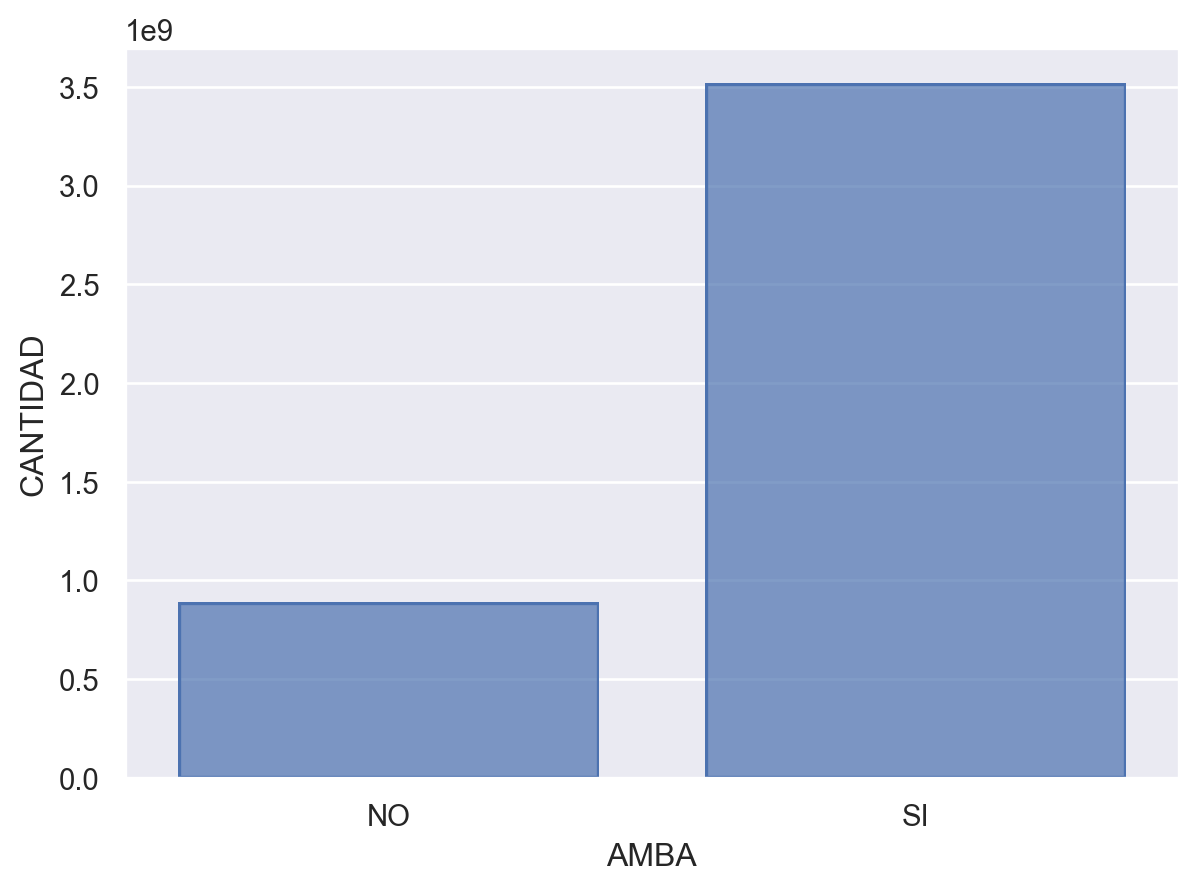

In [29]:
#GRAICOS SUELTOS COMO PARA HACER ALGO
df_agrupado = SUBE_2023.groupby('AMBA')['CANTIDAD'].sum().reset_index()
(
    so.Plot(data = df_agrupado, x = "AMBA", y = "CANTIDAD")
    .add(so.Bar())
)


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


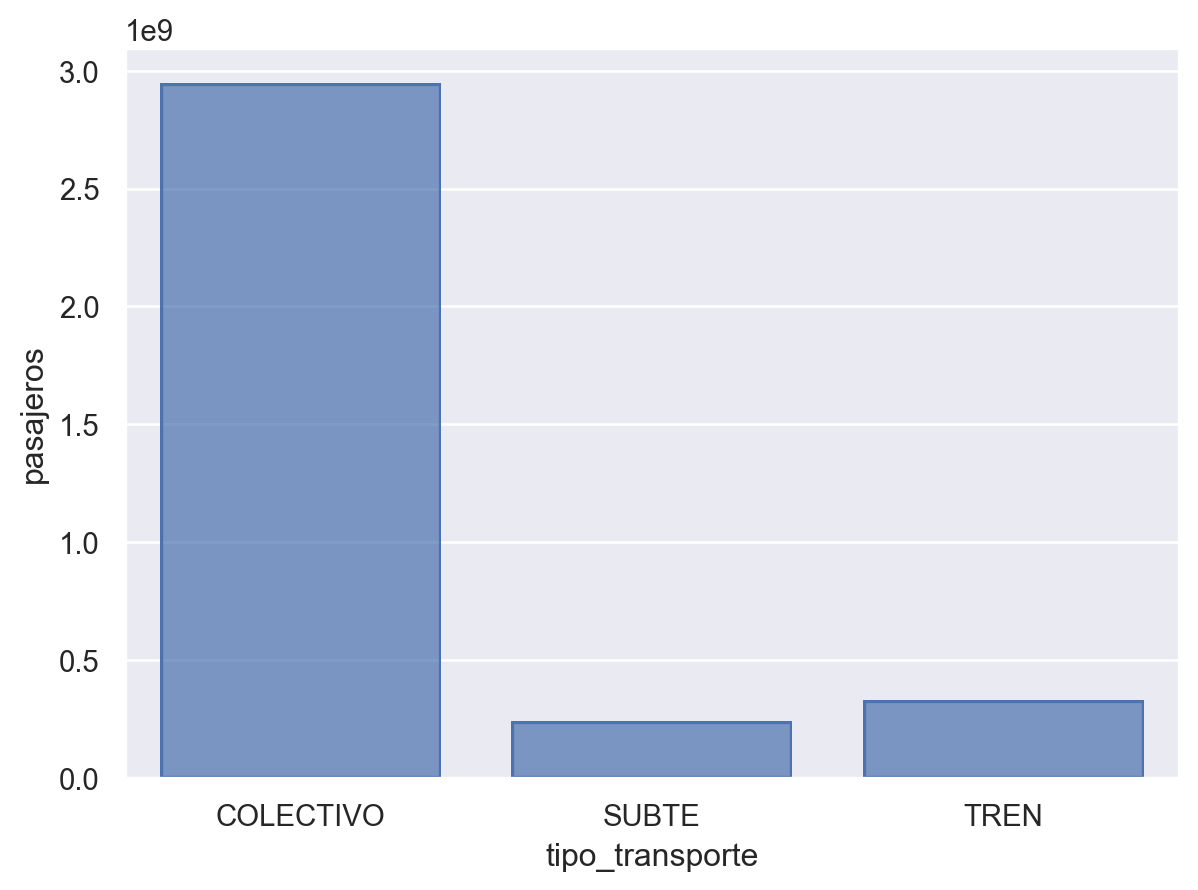

In [30]:
amba_agrupados = datos_amba.groupby('tipo_transporte')['pasajeros'].sum().reset_index()
(
    so.Plot(data = amba_agrupados, x = "tipo_transporte", y = "pasajeros")
    .add(so.Bar())
)

### <br> Ejercicio 4) <br>

#### Analizamos la evolución de los pasajeros transportados en SUBTE a lo largo del año 2023

In [40]:
#Creamos un nuevo DataFrame a partir de datos_amba para estudiar el comportamiento de los subtes.

subtes = datos_amba[datos_amba["tipo_transporte"]=="SUBTE"].reset_index().drop(["index"], axis = 1) 
subtes = subtes[subtes["linea"] != "LIN_PREMETRO"] #Excluímos el premetro por la escases de datos en comparación con las otras líneas.
subtes["linea"].replace({"LINEA_A": "LINEA SUBTE A", "LINEA_B": "LINEA SUBTE B"}, inplace = True)

subtes.head()

,fecha,fecha_dia,fecha_mes,fecha_ordinal,jurisdiccion,linea,pasajeros,tipo_transporte
1,2023-01-01,Sun,01,1,NaN,LINEA SUBTE C,20434,SUBTE
2,2023-01-01,Sun,01,1,NaN,LINEA SUBTE D,13121,SUBTE
3,2023-01-01,Sun,01,1,NaN,LINEA SUBTE E,7681,SUBTE
4,2023-01-01,Sun,01,1,NaN,LINEA SUBTE H,7358,SUBTE
5,2023-01-01,Sun,01,1,NaN,LINEA SUBTE A,14359,SUBTE


In [42]:
#Establecemos los colores correspondientes a cada línea

linea_colores = {
    'LINEA SUBTE A': '#00a7ce', # celeste
    'LINEA SUBTE B': '#df001d', # rojo
    'LINEA SUBTE C': '#003da7', # azul
    'LINEA SUBTE D': '#007360', # verde
    'LINEA SUBTE E': '#761c7c', # violeta
    'LINEA SUBTE H': '#f1cd00', # amarillo
}

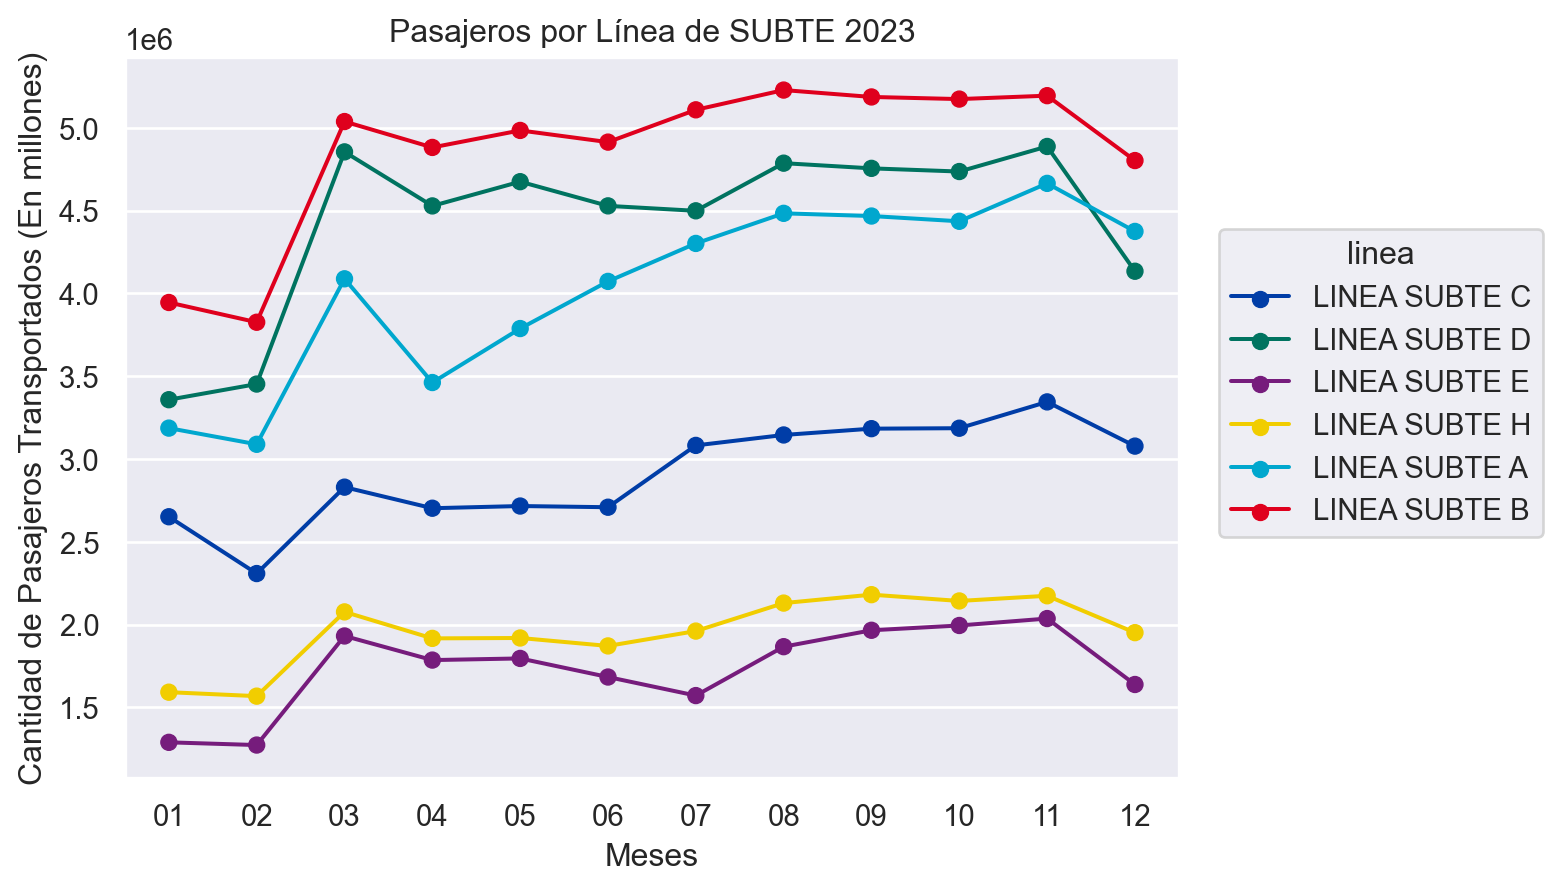

In [58]:
# Graficamos la cantidad de pasajeros transportados por línea por mes

import warnings
warnings.filterwarnings('ignore')

(
    so.Plot(data = subtes, x = "fecha_mes", y = "pasajeros", color="linea")
    .add(so.Dot(), so.Agg("sum"))
    .add(so.Line(), so.Agg("sum"))
    .scale(color=linea_colores)
    .label(x="Meses", y="Cantidad de Pasajeros Transportados (En millones)", title="Pasajeros por Línea de SUBTE 2023")
)


#### Observaciones:
##### - El uso del SUBTE aumenta en el mes de marzo correspondiendose con el fin del período vacacional. (Con excepción de la Línea A, en celeste, 
##### la cual se encontraba con servicio interrumpido por obras de mantenimiento)
##### - La mayor caída en la línea D también se explica por reformas en algunas de sus estaciones.<br>

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


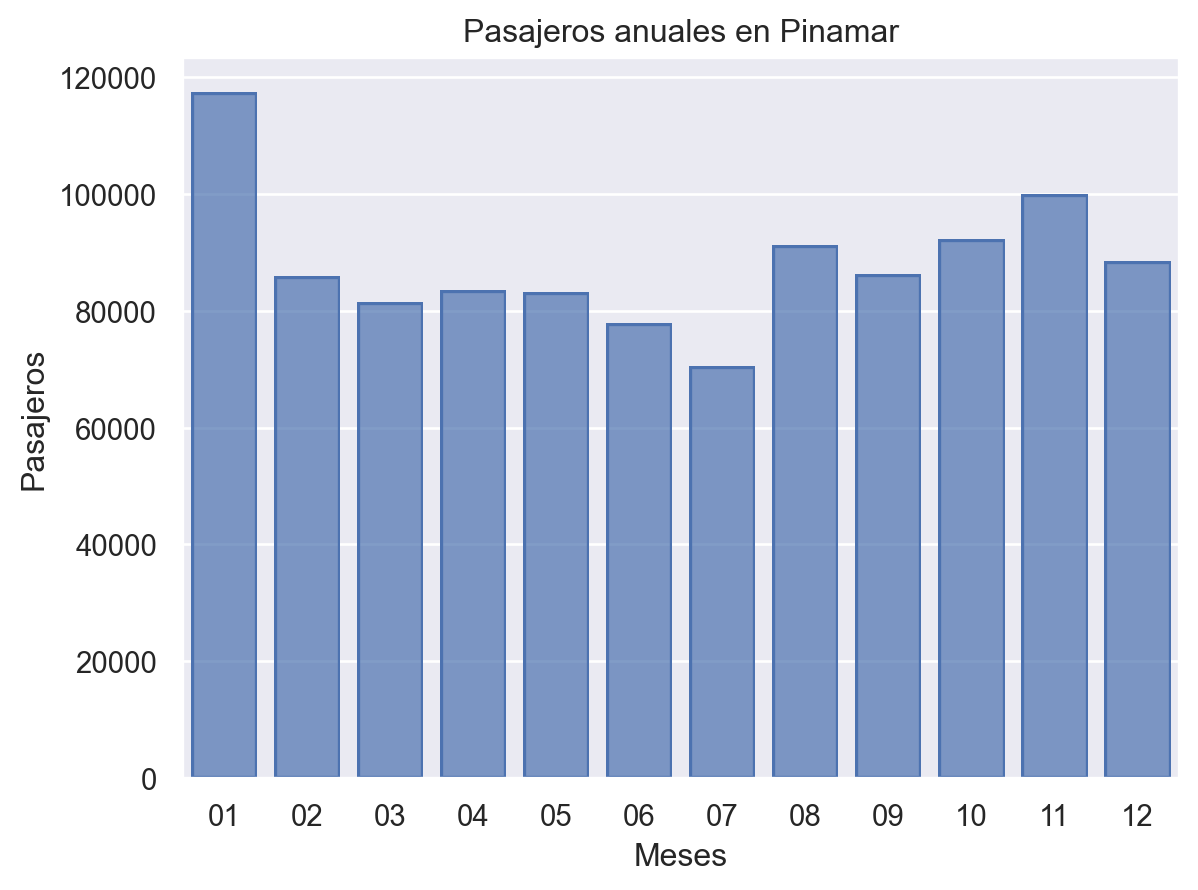

In [32]:
pinamar = SUBE_2023[(SUBE_2023["MUNICIPIO"] == "PINAMAR")].groupby("FECHA_MES")["CANTIDAD"].sum().reset_index()
(
    so.Plot(data = pinamar, x = "FECHA_MES", y = "CANTIDAD")
    .add(so.Bar())
    .label(x ="Meses", y = "Pasajeros", title = "Pasajeros anuales en Pinamar")
)
#AL SER UN LUGAR VACACIONAL, ES NATURAL VER QUE ENERO TENGA MUCHISIMOS PASAJEROS
#COMO ES COSTERO, SUPONEMOS QUE JULIO NO TIENE MUCHO MOVIMIENTO (NO ES LA EPOCA MAS POPULAR PARA IR A LA PLAYA)
#HAY UNA PEQUEÑA SUBIDA EN NOVIEMBRE YA QUE ES CERCA DEL VERANO, PERO SE PUEDE VER UNA PEQUEÑA BAJADA EN DICIEMBRE. ESTO PUEDE SER POR LA INCERTIDUMBRE ANTE EL NUEVO GOBIERNO NACIONAL Y LA DIFICIL SITUACION ECONOMICA
#POR LO QUE NO MUCHA GENTE SE MOVILIZO EN LA TEMPORADA 2023/2024 (A CHEQUEAR PERO ME SUENA Q PASO ALGO ASI)
#POR OTRO LADO, MAS ALLA DE LO ECONOMICO O LO NACIONAL, DICIEMBRE NO TIENE TANTO MOVIMIENTO COMO ENERO, YA QUE LAS VACACIONES ESTAN RECIEN COMENZANDO, Y EN ENERO YA EMPEZARON.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


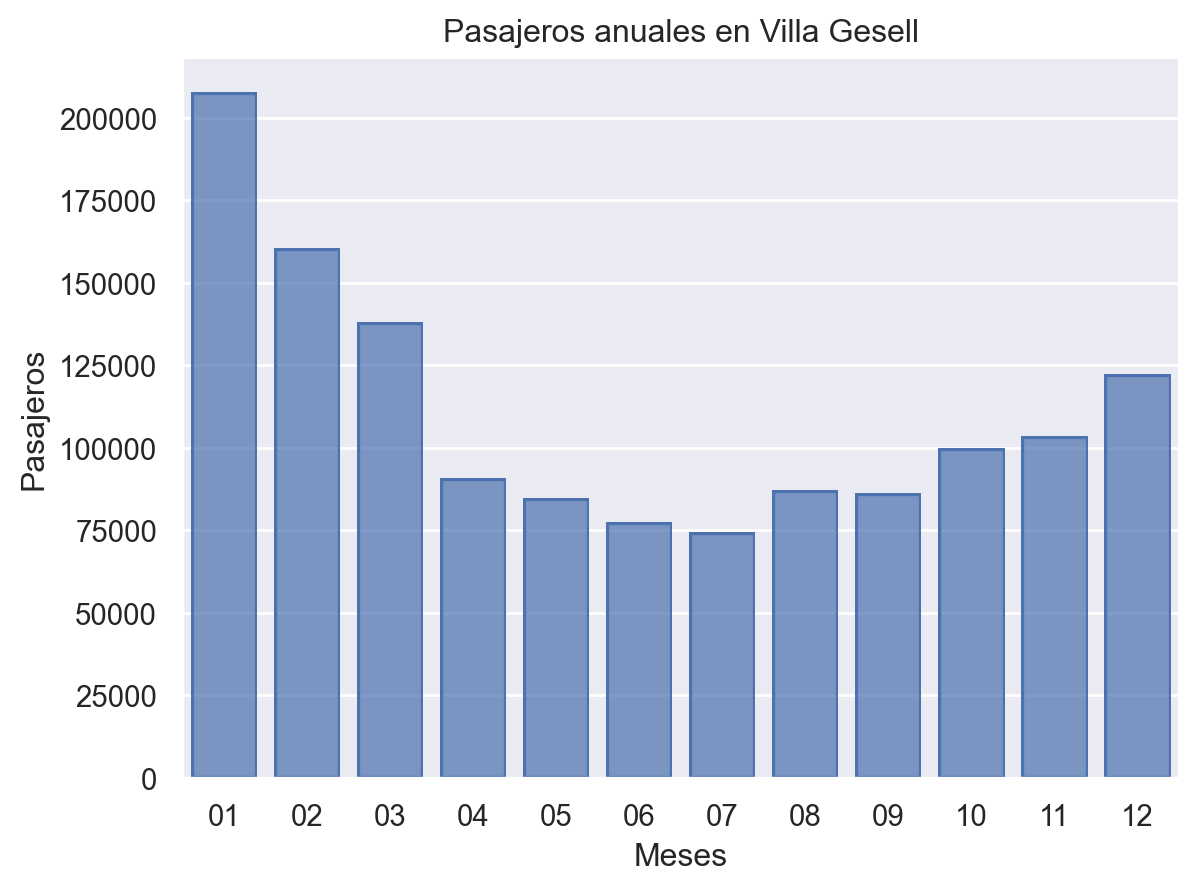

In [33]:
gesell = SUBE_2023[(SUBE_2023["MUNICIPIO"] == "VILLA GESELL")].groupby("FECHA_MES")["CANTIDAD"].sum().reset_index()
(
    so.Plot(data = gesell, x = "FECHA_MES", y = "CANTIDAD")
    .add(so.Bar())
    .label(x ="Meses", y = "Pasajeros", title = "Pasajeros anuales en Villa Gesell")
)
#COMPARANDOLO CON PINAMAR, SE PUEDE VER UNA TENDENCIA SIMILAR, CON LA DIFERENCIA DE QUE GESELL ES UN DESTINO MAS POPULAR QUE PINAMAR, POR LO QUE EN TEMPORADA ALTA HAY MUCHA MAS MOVILIDAD QUE CON EL OTRO MUNICIPIO
#PERO LAS CANTIDADES SON BASTANTE SIMILARES EN TEMPORADA BAJA